# 1. Importing necessary libaries and packages

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [103]:
# Load the CSV dataset
df = pd.read_csv('../inputs/telco_data.csv')

In [104]:
# Display the first few rows of the dataset
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...         Yes   
4                No     Fiber optic             No  ...          No   

  StreamingTV StreamingMovies                          ReasonForLeaving  \
0          No              No                                       NaN   
1          No              No                                       NaN   
2          No              No  Not enough good shows or movies to watch   
3          No              No                                       NaN   
4          No              No                      Too expensive for me   

         Contract PaperlessBilling              PaymentMethod MonthlyCharges  \
0  Month-to-month              Yes           Electronic check          29.85   
1        One year               No               Mailed check          56.95   
2  Month-to-month              Yes               Mailed check          53.85   
3        One year               No  Bank transfer (automatic)          42.30   
4  Month-to-month              Yes           Electronic check          70.70   

  TotalCharges  Churn  
0        29.85     No  
1       1889.5     No  
2       108.15    Yes  
3      1840.75     No  
4       151.65    Yes  

[5 rows x 22 columns]

In [105]:
# Check the data types of each column
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
ReasonForLeaving     object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [106]:
# Check for missing values
df.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
ReasonForLeaving    5174
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

# Plot the count of churned and non-churned customers

Text(0.5, 1.0, 'Churned vs Non-Churned Customers')

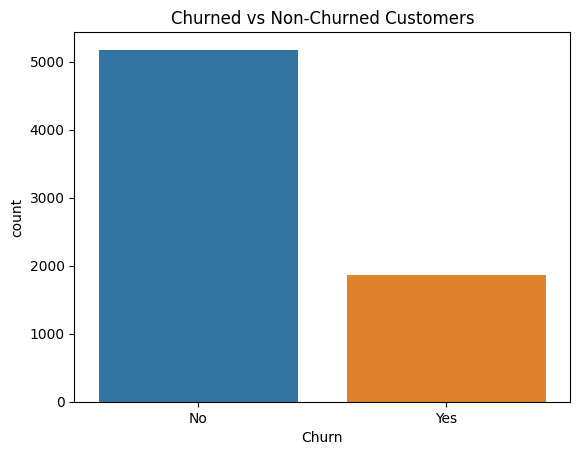

In [107]:
sns.countplot(x='Churn', data=df)
plt.title('Churned vs Non-Churned Customers')

# Explore churn rate by gender

Text(0.5, 1.0, 'Churn Rate by Gender')

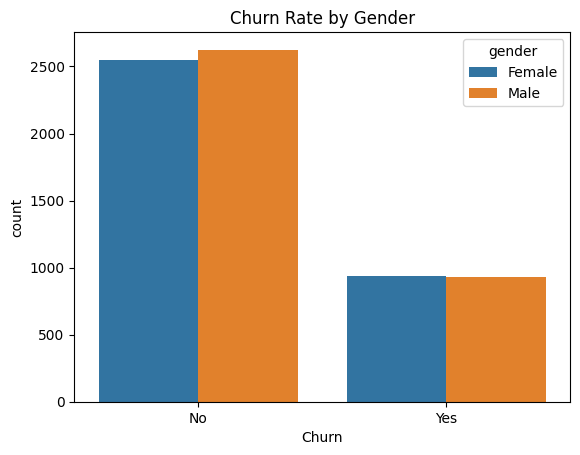

In [108]:
sns.countplot(x='Churn', hue='gender', data=df)
plt.title('Churn Rate by Gender')

# Explore churn rate by internet service type

Text(0.5, 1.0, 'Churn Rate by Internet Service')

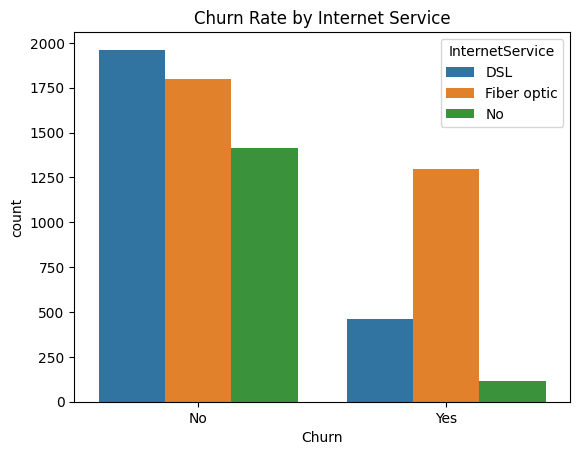

In [109]:
sns.countplot(x='Churn', hue='InternetService', data=df)
plt.title('Churn Rate by Internet Service')

# Explore churn rate by contract type

Text(0.5, 1.0, 'Churn Rate by Contract Type')

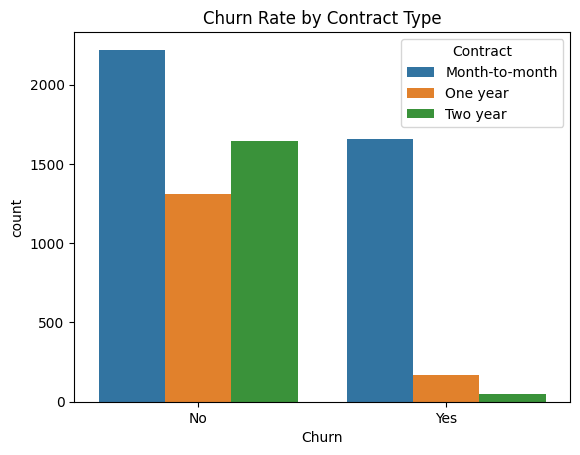

In [110]:
sns.countplot(x='Churn', hue='Contract', data=df)
plt.title('Churn Rate by Contract Type')

# Calculate the churn rate

In [111]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Churn Rate:\n", churn_rate)

Churn Rate:
 No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


# Top reasons for churning

In [112]:
top_reasons = df['ReasonForLeaving'].value_counts().nlargest(5)
print("Top Reasons for Churning:\n", top_reasons)

Top Reasons for Churning:
 Not enough good shows or movies to watch     292
Poor customer service                        290
My favorite show is not available anymore    270
Hard to use                                  259
Switching to another cable provider          254
Name: ReasonForLeaving, dtype: int64


# Customer segmentation based on tenure with churn rate

Customer Segmentation by Tenure:
 37+      3001
0-12     2175
13-24    1024
25-36     832
Name: TenureSegment, dtype: int64
Churn Rates by Tenure Segment:
 TenureSegment
0-12     47.678161
13-24    28.710938
25-36    21.634615
37+      11.929357
Name: Churn, dtype: float64


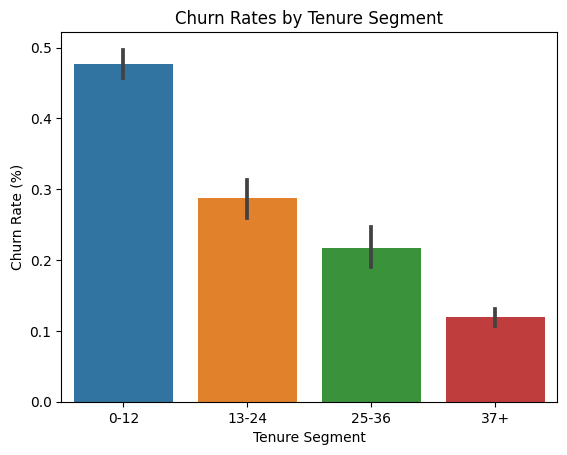

In [113]:
# Convert 'Churn' column to numeric format
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Calculate churn rates for each tenure segment
df['TenureSegment'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, df['tenure'].max()], labels=['0-12', '13-24', '25-36', '37+'])
segment_counts = df['TenureSegment'].value_counts()
churn_rates = df.groupby('TenureSegment')['Churn'].mean() * 100
print("Customer Segmentation by Tenure:\n", segment_counts)
print("Churn Rates by Tenure Segment:\n", churn_rates)

# Visualize churn rates by tenure segment
sns.barplot(x='TenureSegment', y='Churn', data=df)
plt.title('Churn Rates by Tenure Segment')
plt.xlabel('Tenure Segment')
plt.ylabel('Churn Rate (%)')
plt.show()

#### According to Statista (https://www.statista.com/statistics/816735/customer-churn-rate-by-industry-us/), the customer churn rate for the telecom industry is 21%.

# Top reason for churning within each tenure segment

In [114]:
df['TenureSegment'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, df['tenure'].max()], labels=['0-12', '13-24', '25-36', '37+'])
segment_counts = df['TenureSegment'].value_counts()
churn_rates = df.groupby('TenureSegment')['Churn'].mean() * 100
print("Customer Segmentation by Tenure:\n", segment_counts)
print("Churn Rates by Tenure Segment:\n", churn_rates)

# Find top reason for churning within each segment
top_reasons = df.groupby('TenureSegment')['ReasonForLeaving'].apply(lambda x: x.value_counts().idxmax())
print("Top Reasons for Churning by Tenure Segment:\n", top_reasons)

Customer Segmentation by Tenure:
 37+      3001
0-12     2175
13-24    1024
25-36     832
Name: TenureSegment, dtype: int64
Churn Rates by Tenure Segment:
 TenureSegment
0-12     47.678161
13-24    28.710938
25-36    21.634615
37+      11.929357
Name: Churn, dtype: float64
Top Reasons for Churning by Tenure Segment:
 TenureSegment
0-12      Not enough good shows or movies to watch
13-24                        Poor customer service
25-36    My favorite show is not available anymore
37+      My favorite show is not available anymore
Name: ReasonForLeaving, dtype: object


# Explore churn rate by senior citizen status

Text(0.5, 1.0, 'Churn Rate by Senior Citizen Status')

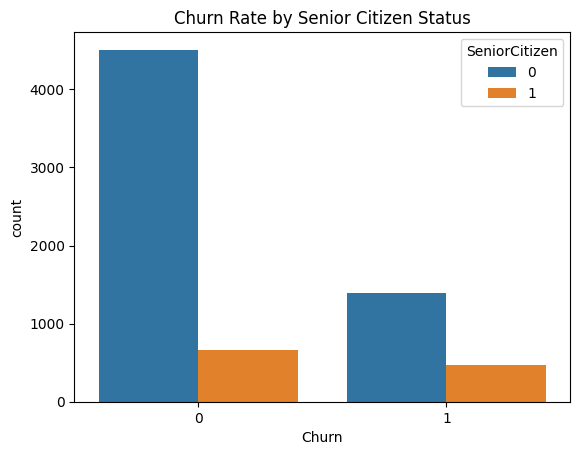

In [115]:
sns.countplot(x='Churn', hue='SeniorCitizen', data=df)
plt.title('Churn Rate by Senior Citizen Status')

# Investigate the relationship between monthly charges and churn

Text(0.5, 1.0, 'Relationship between Monthly Charges and Churn')

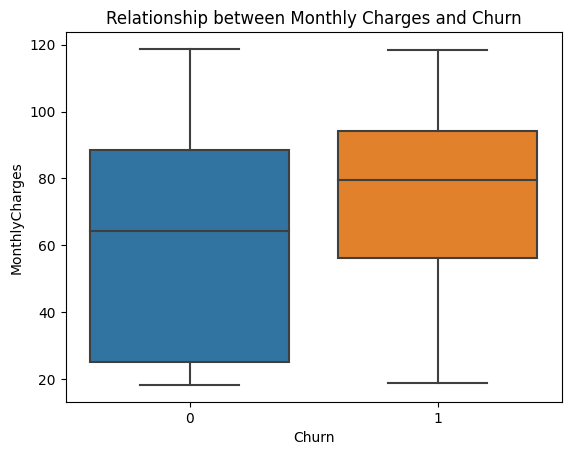

In [116]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Relationship between Monthly Charges and Churn')

# Compare churn rate between customers with and without phone service

Text(0.5, 1.0, 'Churn Rate by Phone Service')

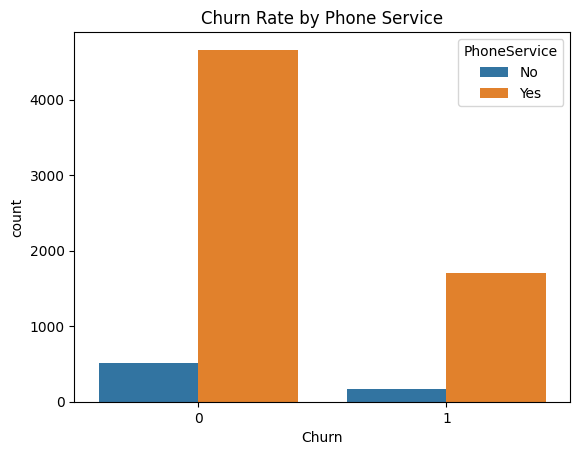

In [117]:
sns.countplot(x='Churn', hue='PhoneService', data=df)
plt.title('Churn Rate by Phone Service')

# Analyze the distribution of payment methods

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

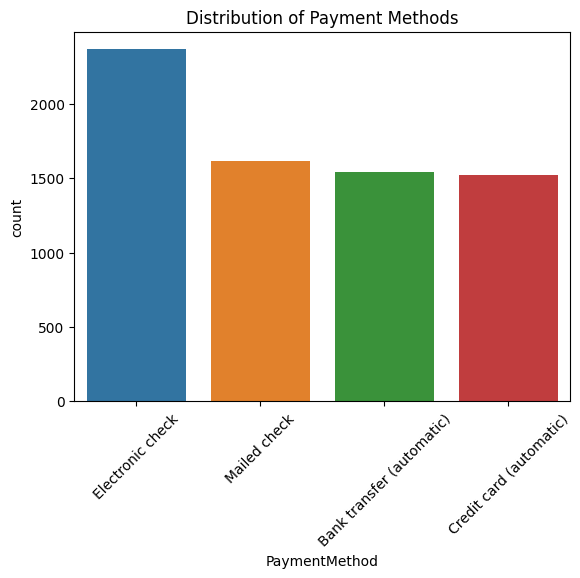

In [118]:
sns.countplot(x='PaymentMethod', data=df)
plt.title('Distribution of Payment Methods')
plt.xticks(rotation=45)

# Calculate churn rate for customers with and without phone service

In [119]:
churn_rate_phone_service = df[df['PhoneService'] == 'Yes']['Churn'].value_counts(normalize=True) * 100
churn_rate_no_phone_service = df[df['PhoneService'] == 'No']['Churn'].value_counts(normalize=True) * 100
print("Churn Rate with Phone Service:\n", churn_rate_phone_service)
print("Churn Rate without Phone Service:\n", churn_rate_no_phone_service)

Churn Rate with Phone Service:
 0    73.290363
1    26.709637
Name: Churn, dtype: float64
Churn Rate without Phone Service:
 0    75.073314
1    24.926686
Name: Churn, dtype: float64


Top Predictors for Churn:
 {'gender': nan, 'SeniorCitizen': nan, 'Partner': nan, 'Dependents': nan, 'PhoneService': nan}


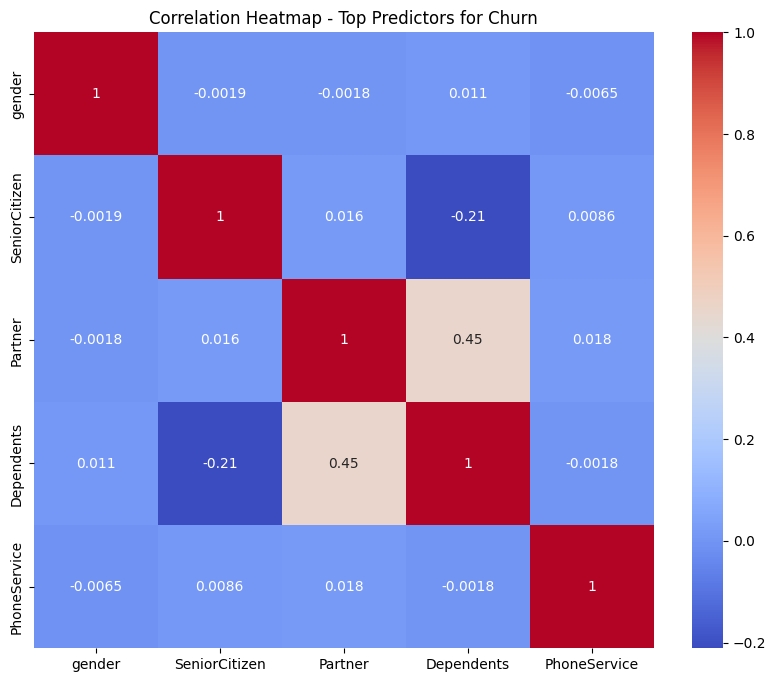

In [123]:
# Convert 'Churn' column to numeric format
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Select the columns to analyze for churn prediction
predictor_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                     'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                     'ReasonForLeaving', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                     'MonthlyCharges', 'TotalCharges']

# Calculate the correlation between predictors and churn
correlations = {}
for column in predictor_columns:
    if df[column].dtype == 'object':
        # Convert categorical variables to numerical using label encoding
        df[column] = df[column].astype('category').cat.codes
    correlations[column] = np.corrcoef(df[column], df['Churn'])[0, 1]

# Sort the results by correlation coefficient in descending order
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

# Display the top predictors for churn
top_predictors = dict(sorted_correlations[:5])
print("Top Predictors for Churn:\n", top_predictors)

# Create a correlation matrix
corr_matrix = df[list(top_predictors.keys())].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Top Predictors for Churn')
plt.show()
